In [ ]:
# Import google_streetview for the api module
import google_streetview.api

In [ ]:
# Define parameters for street view api
# 'heading': '151.78',
# 'pitch': '-0.76',

params = [{
    'size': '600x480', # max 640x640 pixels
    'location': '41.90484603740257,-87.63110961124634',
    'key': ''
}]

In [ ]:
# Create a results object
results = google_streetview.api.results(params)


In [ ]:
results

In [ ]:
# Download images to directory 'downloads'
results.download_links('tmp_gsv')

## Load block scores by Emily Talen

In [ ]:
import geopandas as gpd

In [ ]:
target_blocks = gpd.read_file('./Good_blocks/GoodBlocks_3criteria.shp')

In [ ]:
target_blocks.crs

{'init': 'epsg:4326'}

In [ ]:
import pyproj
# using the Chicago center
aeqd = pyproj.Proj(proj='aeqd', ellps='WGS84', datum='WGS84', lat_0=41.881832, lon_0=-87.623177).srs


In [ ]:
# do this on a seperate geopanda frame

#target_blocks = target_blocks.to_crs(crs = aeqd)

In [ ]:
target_blocks.crs

{'init': 'epsg:4326'}

In [ ]:
target_blocks.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 2857 entries, 0 to 2856
Data columns (total 56 columns):
statefp10     2857 non-null object
countyfp10    2857 non-null object
tractce10     2857 non-null object
geoid10       2857 non-null object
blockce10     2857 non-null object
tract_bloc    2857 non-null object
name10        2857 non-null object
DummyTotal    2857 non-null int64
Block_Dail    2857 non-null int64
Block_Da_1    2857 non-null int64
Block_degr    2857 non-null int64
Block_Empl    2857 non-null int64
Block_Land    2857 non-null int64
Block_pct_    2320 non-null float64
Block_Rati    479 non-null float64
Chainpct      2857 non-null int64
totalDvar     2857 non-null int64
AREA          2857 non-null int64
NN            2857 non-null int64
DEssential    2857 non-null int64
NN_1_ess      2857 non-null int64
C_ess         2857 non-null int64
SD1_ESSEN     2857 non-null int64
DOption       2857 non-null int64
NN_1_opt      2857 non-null int64
C_opt         2857 non-nu

In [ ]:
selection = target_blocks[0:50]
selection['geometry'].centroid

0     POINT (-87.63110961124634 41.90484603740257)
1      POINT (-87.62797764781516 41.8995422101444)
2     POINT (-87.65817993180627 41.83808360634507)
3     POINT (-87.67575346606714 41.91574516615612)
4      POINT (-87.62181042565396 41.8927479550368)
5     POINT (-87.76538319988178 41.79549417515664)
6      POINT (-87.62567810861476 41.8407803323968)
7     POINT (-87.62156329671784 41.88744240457235)
8       POINT (-87.6986676903345 41.8507880697169)
9     POINT (-87.76301523701635 41.87210054317957)
10    POINT (-87.65299952593062 41.93378358676672)
11    POINT (-87.69663541242356 41.78612823195157)
12    POINT (-87.67468803021315 41.85471770653599)
13      POINT (-87.670414631388 41.96066475803027)
14    POINT (-87.75326545542165 41.79735810755157)
15    POINT (-87.64234991567183 41.88378561462976)
16    POINT (-87.78745949419154 41.90944058349282)
17     POINT (-87.6430830012613 41.88379987570574)
18     POINT (-87.7130558596082 41.74096557895368)
19    POINT (-87.65738733484162



## Get the Open Street Map chicago roads
And calculate the bearings

In [ ]:
# https://github.com/gboeing/osmnx-examples/blob/master/notebooks/15-calculate-visualize-edge-bearings.ipynb
# getting the load bearing


In [ ]:
import matplotlib.pyplot as plt
import osmnx as ox
import pandas as pd
%matplotlib inline
ox.config(log_console=True, use_cache=True)
ox.__version__

'0.10'

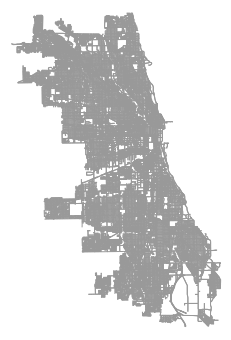

In [ ]:
#G = ox.graph_from_place('Chicago, Illinois', network_type='drive')
#ox.save_graphml(G, filename='Chicago_road.graphml')

# use the local data
G = ox.load_graphml('Chicago_road.graphml', folder='Good_blocks')
fig, ax = ox.plot_graph(ox.project_graph(G), node_size=0)

In [ ]:
G2 = ox.graph_from_place('Chicago, Illinois', network_type='walk')

In [ ]:
ox.save_graphml(G2, filename='Chicago_walkable_road.graphml')

In [ ]:
basic_stats = ox.basic_stats(G)
basic_stats

{'n': 28368,
 'm': 75659,
 'k_avg': 5.334108855047941,
 'intersection_count': 26294,
 'streets_per_node_avg': 3.375846023688663,
 'streets_per_node_counts': {0: 0,
  1: 2074,
  2: 217,
  3: 11292,
  4: 14588,
  5: 154,
  6: 41,
  7: 2},
 'streets_per_node_proportion': {0: 0.0,
  1: 0.07311054709531867,
  2: 0.00764946418499718,
  3: 0.39805414551607443,
  4: 0.5142413987591653,
  5: 0.005428652002256063,
  6: 0.0014452904681331077,
  7: 7.050197405527355e-05},
 'edge_length_total': 10458557.527999885,
 'edge_length_avg': 138.23282792529488,
 'street_length_total': 6856741.894999939,
 'street_length_avg': 144.10066399764494,
 'street_segments_count': 47583,
 'node_density_km': None,
 'intersection_density_km': None,
 'edge_density_km': None,
 'street_density_km': None,
 'circuity_avg': 1.0155452177615694,
 'self_loop_proportion': 0.001242416632522238,
 'clean_intersection_count': None,
 'clean_intersection_density_km': None}

In [ ]:
G = ox.add_edge_bearings(G)
bearings = pd.Series([data['bearing'] for u, v, k, data in G.edges(keys=True, data=True)])

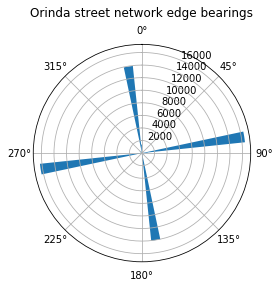

In [ ]:
# polar plot -- looks like a grided street network
import numpy as np
n = 60
count, division = np.histogram(bearings, bins=[ang*360/n for ang in range(0,n+1)])
division = division[0:-1]
width =  2 * np.pi/n
ax = plt.subplot(111, projection='polar')
ax.set_theta_zero_location('N')
ax.set_theta_direction('clockwise')
bars = ax.bar(division * np.pi/180 - width * 0.5 , count, width=width, bottom=0.0)
ax.set_title('Orinda street network edge bearings', y=1.1)
plt.show()

## Given a coordinate, find the nearest edge and retrieve the bearing

In [ ]:
# https://automating-gis-processes.github.io/CSC/notebooks/L3/retrieve_osm_data.html
nodes, edges = ox.graph_to_gdfs(G2)
print("Nodes:\n", nodes.head(), '\n')
print("Edges:\n", edges.head(), '\n')
print("Type:", type(edges))

Nodes:
            highway       osmid  ref          x          y  \
3428581393     NaN  3428581393  NaN -87.693877  41.844415   
3428581394     NaN  3428581394  NaN -87.694339  41.844503   
2356412433     NaN  2356412433  NaN -87.758318  41.869808   
1750335505     NaN  1750335505  NaN -87.729940  41.773041   
1750335516     NaN  1750335516  NaN -87.741925  41.782089   

                                         geometry  
3428581393  POINT (-87.69387690000001 41.8444148)  
3428581394  POINT (-87.69433890000001 41.8445031)  
2356412433  POINT (-87.75831770000001 41.8698082)  
1750335505         POINT (-87.7299397 41.7730405)  
1750335516  POINT (-87.74192480000001 41.7820886)   

Edges:
   access area bridge                                           geometry  \
0    NaN  NaN    NaN  LINESTRING (-87.69387690000001 41.8444148, -87...   
1    NaN  NaN    NaN  LINESTRING (-87.69433890000001 41.8445031, -87...   
2    NaN  NaN    NaN  LINESTRING (-87.75831770000001 41.8698082, -87...   
3  

In [ ]:
edges['highway_str'] = edges['highway'].astype(str)

In [ ]:
edges.groupby('highway_str').count()

,access,area,bridge,geometry,highway,junction,key,landuse,lanes,length,maxspeed,name,oneway,osmid,ref,service,tunnel,u,v,width
highway_str,,,,,,,,,,,,,,,,,,,,
"['footway', 'path']",0,0,14,124,124,0,124,0,0,124,0,10,124,124,0,0,12,124,124,0
"['footway', 'pedestrian']",0,0,2,20,20,0,20,0,0,20,0,8,20,20,0,0,6,20,20,0
"['footway', 'residential']",2,0,4,150,150,0,150,0,0,150,0,146,150,150,0,0,2,150,150,0
"['footway', 'secondary']",0,0,0,2,2,0,2,0,0,2,0,2,2,2,0,0,0,2,2,0
"['footway', 'steps', 'path']",0,0,0,4,4,0,4,0,0,4,0,0,4,4,0,0,2,4,4,0
"['footway', 'steps', 'pedestrian']",0,0,0,16,16,0,16,0,0,16,0,12,16,16,0,0,8,16,16,0
"['footway', 'steps', 'residential']",0,0,2,2,2,0,2,0,0,2,0,2,2,2,0,0,0,2,2,0
"['footway', 'steps', 'tertiary']",0,0,2,2,2,0,2,0,0,2,0,2,2,2,0,0,0,2,2,0
"['footway', 'steps']",2,0,98,750,750,0,750,0,0,750,0,86,750,750,0,0,206,750,750,0


In [ ]:
edges.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 351428 entries, 0 to 351427
Data columns (total 21 columns):
access         1836 non-null object
area           12 non-null object
bridge         1368 non-null object
geometry       351428 non-null object
highway        351428 non-null object
junction       50 non-null object
key            351428 non-null int64
landuse        2 non-null object
lanes          20830 non-null object
length         351428 non-null float64
maxspeed       4214 non-null object
name           175764 non-null object
oneway         351428 non-null bool
osmid          351428 non-null object
ref            4798 non-null object
service        95078 non-null object
tunnel         2120 non-null object
u              351428 non-null int64
v              351428 non-null int64
width          58 non-null object
highway_str    351428 non-null object
dtypes: bool(1), float64(1), int64(3), object(16)
memory usage: 54.0+ MB


In [ ]:
edges.crs

'+proj=longlat +ellps=WGS84 +datum=WGS84 +no_defs'

In [ ]:
# roads, in deg
edges['geometry'][0].distance( selection['geometry'].centroid[0] )

0.20414747290816462

In [ ]:
def min_distance_edge_id(point):
    return edges.geometry.distance(point).idxmin()

In [ ]:
min_distance_edge_id( selection['geometry'].centroid[0] )

15653

In [ ]:
# find the nearest road edge for each block
# 50 entries take 25s --> 3000 will take about 1500s / ~25 min
#selection['edge_id'] = selection.apply(lambda row: min_distance_edge_id(row.geometry.centroid), axis=1).copy()
%time target_blocks['edge_id'] = target_blocks.apply(lambda row: min_distance_edge_id(row.geometry.centroid), axis=1).copy()


Wall time: 24min 12s


In [ ]:
#%time selection['heading'] = selection.apply(lambda row: edges.bearing[row.edge_id], axis=1)
%time target_blocks['heading'] = target_blocks.apply(lambda row: edges.bearing[row.edge_id], axis=1)

Wall time: 143 ms


In [ ]:
# 50 entries take 40s --> 3000 will take about 2400s / ~40 min

#%time selection['dist_matched_edge'] = selection.apply(lambda row: edges.centroid[row.edge_id].distance(row.geometry.centroid), axis=1)
%time target_blocks['dist_matched_edge'] = target_blocks.apply(lambda row: edges.centroid[row.edge_id].distance(row.geometry.centroid), axis=1)

Wall time: 39min 5s


# This is to add the edge centroid location

In [ ]:
import geopandas as gpd
target_blocks = gpd.read_file('./Good_blocks/gsv_blocks_with_heading.shp')

In [ ]:
selection = target_blocks[0:50]
edges['center_coord'] = edges.centroid


In [ ]:
edges

,access,area,bearing,bridge,geometry,highway,junction,key,lanes,length,maxspeed,name,oneway,osmid,ref,service,tunnel,u,v,center_coord
0,NaN,NaN,358.340,NaN,"LINESTRING (-87.7974442 41.7847525, -87.797515...",residential,NaN,0,NaN,204.040,NaN,South Nordica Avenue,True,24106153,NaN,NaN,NaN,261226496,261307236,POINT (-87.79747985 41.78566960000001)
1,NaN,NaN,268.718,NaN,"LINESTRING (-87.7974442 41.7847525, -87.798077...",residential,NaN,0,NaN,103.352,NaN,West 59th Street,False,32804145,NaN,NaN,NaN,261226496,261226498,POINT (-87.79806730054435 41.78474213261008)
2,NaN,NaN,88.714,NaN,"LINESTRING (-87.7974442 41.7847525, -87.796808...",residential,NaN,0,NaN,105.085,NaN,West 59th Street,False,32804145,NaN,NaN,NaN,261226496,261141456,POINT (-87.79681064962918 41.78476307783748)
3,NaN,NaN,358.612,NaN,"LINESTRING (-87.70552499999999 41.896442, -87....",residential,NaN,0,NaN,161.236,NaN,North Troy Street,False,24078837,NaN,NaN,NaN,261095425,261159190,POINT (-87.70554860000001 41.8971668)
4,NaN,NaN,268.724,NaN,"LINESTRING (-87.7986904 41.7847317, -87.799335...",residential,NaN,0,NaN,104.853,NaN,West 59th Street,False,32804145,NaN,NaN,NaN,261226498,261226501,POINT (-87.79932255007022 41.78472120422647)
5,NaN,NaN,88.717,NaN,"LINESTRING (-87.7986904 41.7847317, -87.798077...",residential,NaN,0,NaN,103.352,NaN,West 59th Street,False,32804145,NaN,NaN,NaN,261226498,261226496,POINT (-87.79806730054435 41.78474213261008)
6,NaN,NaN,268.379,NaN,"LINESTRING (-87.6340294 41.658183, -87.6352399...",residential,NaN,0,NaN,100.604,NaN,West 129th Place,False,24116340,NaN,NaN,NaN,261292033,261198798,POINT (-87.63463465000001 41.6581702)
7,NaN,NaN,88.923,NaN,"LINESTRING (-87.6340294 41.658183, -87.6328044...",residential,NaN,0,NaN,101.787,NaN,West 129th Place,False,24116340,NaN,NaN,NaN,261292033,261321768,POINT (-87.6334169 41.6581916)
8,NaN,NaN,358.524,NaN,"LINESTRING (-87.6340294 41.658183, -87.6340458...",residential,NaN,0,NaN,266.000,NaN,South Normal Avenue,True,24103304,NaN,NaN,NaN,261292033,261174323,POINT (-87.63407065484702 41.65937869983274)
9,NaN,NaN,358.319,NaN,"LINESTRING (-87.7999547 41.7847107, -87.800026...",residential,NaN,0,NaN,204.020,NaN,South Neva Avenue,True,196459374,NaN,NaN,NaN,261226501,261229993,POINT (-87.7999908 41.7856277)


In [ ]:
%time selection['edge_centroid'] = selection.apply(lambda row: edges.center_coord[row.edge_id], axis=1)

Wall time: 222 ms


C:\Users\kywch\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [ ]:
selection

,statefp10,countyfp10,tractce10,geoid10,blockce10,tract_bloc,name10,DummyTotal,Block_Dail,Block_Da_1,...,MeanWidth,NewRatio,R>0.333,Daily_Amen,area_1,edge_id,heading,dist_match,geometry,edge_centroid
0,17,031,080202,170310802021000,1000,0802021000,Block 1000,1,0,1,...,29.0,1.330,1.0,1,22912,15653,358.581,0.000358,POLYGON ((-87.63071600035892 41.90391399961675...,POINT (-87.63146807143853 41.90484437778282)
1,17,031,081201,170310812011007,1007,0812011007,Block 1007,1,0,2,...,40.0,14.250,1.0,2,7960,15668,178.871,0.000332,POLYGON ((-87.62769500077954 41.89994700055145...,POINT (-87.62830952544969 41.89954289796447)
2,17,031,600700,170316007001015,1015,6007001015,Block 1015,1,0,1,...,40.0,0.540,1.0,1,15616,25747,268.987,0.000543,POLYGON ((-87.65723700017266 41.83831300016668...,POINT (-87.65767395 41.8378854)
3,17,031,831000,170318310002016,2016,8310002016,Block 2016,1,0,1,...,28.0,0.905,1.0,1,9227,11236,88.564,0.000231,POLYGON ((-87.67574400024807 41.91551799968731...,POINT (-87.67576225038778 41.91597567115315)
4,17,031,081403,170310814032005,2005,0814032005,Block 2005,1,0,1,...,26.0,2.400,1.0,1,10314,31770,88.834,0.000377,POLYGON ((-87.62270599976856 41.89290300027024...,POINT (-87.6214778119345 41.89257096612733)
5,17,031,560800,170315608001025,1025,5608001025,Block 1025,1,0,1,...,30.0,0.686,1.0,1,9746,26451,258.165,0.000239,POLYGON ((-87.76483399975716 41.79581999947047...,POINT (-87.7653231 41.79526255)
6,17,031,839200,170318392002018,2018,8392002018,Block 2018,1,1,0,...,26.0,1.385,1.0,1,37652,3786,218.775,0.000927,POLYGON ((-87.62520799999389 41.84081700021657...,POINT (-87.62556650286508 41.83986046398211)
7,17,031,320100,170313201002018,2018,3201002018,Block 2018,1,0,1,...,36.0,9.583,1.0,1,28363,5717,103.156,0.000493,POLYGON ((-87.62235899990245 41.88811200003333...,POINT (-87.62155838706599 41.88793527691033)
8,17,031,840700,170318407002002,2002,8407002002,Block 2002,1,0,1,...,43.0,0.698,1.0,1,21167,21803,89.014,0.001686,POLYGON ((-87.69811999961213 41.85095099943976...,POINT (-87.69699204946063 41.8509720082697)
9,17,031,831400,170318314002006,2006,8314002006,Block 2006,1,0,1,...,26.0,1.187,1.0,1,24829,34005,269.331,0.000611,POLYGON ((-87.76449299998784 41.87182600043231...,POINT (-87.76245595005412 41.87185555621161)


In [ ]:
# print(str(edges.center_coord[1].y) + ',' + str(edges.center_coord[1].x))
%time target_blocks['edge_centroid'] = target_blocks.apply(lambda row: str(edges.center_coord[row.edge_id].y) + ',' + str(edges.center_coord[row.edge_id].x), axis=1)

Wall time: 471 ms


In [ ]:
target_blocks

,statefp10,countyfp10,tractce10,geoid10,blockce10,tract_bloc,name10,DummyTotal,Block_Dail,Block_Da_1,...,MeanWidth,NewRatio,R>0.333,Daily_Amen,area_1,edge_id,heading,dist_match,geometry,edge_centroid
0,17,031,080202,170310802021000,1000,0802021000,Block 1000,1,0,1,...,29.0,1.330,1.0,1,22912,15653,358.581,0.000358,POLYGON ((-87.63071600035892 41.90391399961675...,"41.904844377782815,-87.63146807143853"
1,17,031,081201,170310812011007,1007,0812011007,Block 1007,1,0,2,...,40.0,14.250,1.0,2,7960,15668,178.871,0.000332,POLYGON ((-87.62769500077954 41.89994700055145...,"41.89954289796447,-87.6283095254497"
2,17,031,600700,170316007001015,1015,6007001015,Block 1015,1,0,1,...,40.0,0.540,1.0,1,15616,25747,268.987,0.000543,POLYGON ((-87.65723700017266 41.83831300016668...,"41.837885400000005,-87.65767395"
3,17,031,831000,170318310002016,2016,8310002016,Block 2016,1,0,1,...,28.0,0.905,1.0,1,9227,11236,88.564,0.000231,POLYGON ((-87.67574400024807 41.91551799968731...,"41.91597567115315,-87.67576225038778"
4,17,031,081403,170310814032005,2005,0814032005,Block 2005,1,0,1,...,26.0,2.400,1.0,1,10314,31770,88.834,0.000377,POLYGON ((-87.62270599976856 41.89290300027024...,"41.89257096612733,-87.6214778119345"
5,17,031,560800,170315608001025,1025,5608001025,Block 1025,1,0,1,...,30.0,0.686,1.0,1,9746,26451,258.165,0.000239,POLYGON ((-87.76483399975716 41.79581999947047...,"41.795262550000004,-87.7653231"
6,17,031,839200,170318392002018,2018,8392002018,Block 2018,1,1,0,...,26.0,1.385,1.0,1,37652,3786,218.775,0.000927,POLYGON ((-87.62520799999389 41.84081700021657...,"41.83986046398211,-87.62556650286508"
7,17,031,320100,170313201002018,2018,3201002018,Block 2018,1,0,1,...,36.0,9.583,1.0,1,28363,5717,103.156,0.000493,POLYGON ((-87.62235899990245 41.88811200003333...,"41.887935276910326,-87.62155838706599"
8,17,031,840700,170318407002002,2002,8407002002,Block 2002,1,0,1,...,43.0,0.698,1.0,1,21167,21803,89.014,0.001686,POLYGON ((-87.69811999961213 41.85095099943976...,"41.8509720082697,-87.69699204946063"
9,17,031,831400,170318314002006,2006,8314002006,Block 2006,1,0,1,...,26.0,1.187,1.0,1,24829,34005,269.331,0.000611,POLYGON ((-87.76449299998784 41.87182600043231...,"41.871855556211614,-87.76245595005412"


In [ ]:
# save the target block to file
target_blocks.to_file("./Good_blocks/gsv_blocks_with_heading.shp")


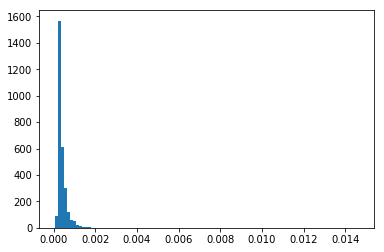

In [ ]:
# distances in degree
# 1 deg = 111km
# 0.001 = 111m

# let's get the histogram
plt.hist(target_blocks.dist_matched_edge, 100)
plt.show()


#target_blocks.dist_matched_edge

In [ ]:
selection.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 59 columns):
statefp10            50 non-null object
countyfp10           50 non-null object
tractce10            50 non-null object
geoid10              50 non-null object
blockce10            50 non-null object
tract_bloc           50 non-null object
name10               50 non-null object
DummyTotal           50 non-null int64
Block_Dail           50 non-null int64
Block_Da_1           50 non-null int64
Block_degr           50 non-null int64
Block_Empl           50 non-null int64
Block_Land           50 non-null int64
Block_pct_           40 non-null float64
Block_Rati           7 non-null float64
Chainpct             50 non-null int64
totalDvar            50 non-null int64
AREA                 50 non-null int64
NN                   50 non-null int64
DEssential           50 non-null int64
NN_1_ess             50 non-null int64
C_ess                50 non-null int64
SD1_ESSEN            



## Let's grab the google street view

In [ ]:
# Import google_streetview for the api module
import google_streetview.api

In [ ]:
print(selection['geometry'][0].centroid)
print(selection['heading'][0])


POINT (-658.2010843526455 2556.227003082687)
358.581


In [ ]:
# Define parameters for street view api
# 'heading': '151.78',
# 'pitch': '-0.76',
#     'heading': '360',

params = [{
    'size': '600x480', # max 640x640 pixels
    'location': '41.90484603740257,-87.63110961124634',
    'key': ''
}]

In [ ]:
results = google_streetview.api.results(params)
results.preview()


[0] 0-1mBkwVQOT8alfxhaAqBQ
date: 2018-10
location: 
  lat: 41.90488183407964
  lng: -87.63146798893365
pano_id: 0-1mBkwVQOT8alfxhaAqBQ
status: OK


In [ ]:
results.download_links('tmp_gsv')